In [4]:
# imports 
%config InlineBackend.figure_format = 'retina'
%pylab inline
import sys
sys.path.append('../../src/')
from helpers import *
from plothelpers import *
from Weibull import *

Populating the interactive namespace from numpy and matplotlib


/Users/Bas/anaconda/envs/thesis2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['flatten', 'colors', 'choice', 'plt', 'entropy', 'gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In this notebook we make several illustrations of the Weibull distribution and its discrete variants.

# Plot of the Weibull distribution

/Users/Bas/anaconda/envs/thesis2/lib/python3.6/site-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


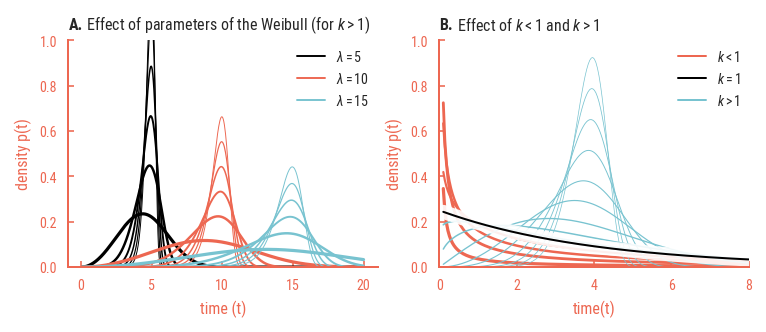

In [5]:
# plot
figure(figsize=cm2inch(12,4))

ax1 = subplot(121)
xs = linspace(0.1,20,500)
colors = mpl.rcParams['axes.color_cycle']
for i, lamb in enumerate([5,10,15]):
    for j, k in enumerate(range(3, 20, 3)):
        T = Weibull(lamb, k)
        l, = plot(xs, T.pmf(xs), color=colors[i], lw=1.5*3**(-j/4)+.1)
        if j == 2:
            l.set_label(r'$\lambda={}$'.format(lamb))
legend()
ylabel('density p(t)')
xlabel('time (t)')
title('Effect of parameters of the Weibull (for $k>1$)')

ax2 = subplot(122,sharey=ax1)
lamb=4
for j, k in enumerate(linspace(.1,1,5).tolist() 
                      + [1.1, 1.4, 2, 3]
                      + linspace(4,10,5).tolist()):
    T = Weibull(lamb, k)
    color = colors[1] if k < 1 else colors[2] if k > 1 else colors[0]
    l, = plot(xs, T.pmf(xs), color=color, lw=1.5*2**(-j/5)+.1)

plot(0,0, colors[1], label=r'$k<1$')
plot(xs, Weibull(lamb, 1).pmf(xs), color='w', lw=7, alpha=.9)
plot(xs, Weibull(lamb, 1).pmf(xs), color='k', lw=1, label=r'$k=1$')
plot(0,0, colors[2], label=r'$k>1$')

ylim(0,1)
xlim(0,8)
ylabel('density p(t)')
xlabel('time(t)')
legend()
title('Effect of $k<1$ and $k>1$')

restyle_title(ax1,ax2)
sns.despine()

subplots_adjust(left=0, bottom=0, right=1, top=1, hspace=.6)
savefig('FIG04-Weibull-params.pdf', bbox_inches='tight')
copyfig('FIG04-Weibull-params.pdf')

# Plot of Single-param Discr Weibull

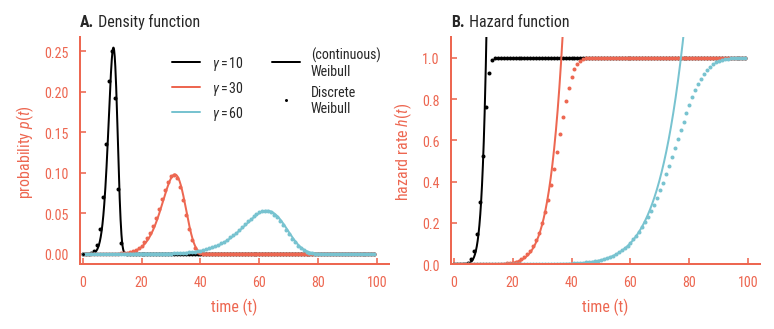

In [6]:
# Plot
figure(figsize=cm2inch(12,4))

ax1 = subplot(121)
ts = arange(100)
xs = linspace(ts[0], ts[-1], 1000)
gammas = [10, 30, 60]
for gamma in gammas:
    T = SingleParamDiscreteWeibull(gamma, k0=5)
    U = Weibull(T.lamb, T.k)
    l, = plot(ts, T.pmf(ts), '.', ms=4)
    plot(xs, U.pmf(xs), '-', color=l.get_color(), label='$\gamma={}$'.format(gamma))
xlim(-1, xlim()[1])
ylabel('probability $p(t)$')
xlabel('time (t)')
title('Density function')
plot(0,0, 'k', label='(continuous)\nWeibull')
plot(0,0, 'k.', label='Discrete\nWeibull')
legend(ncol=2)

ax2 = subplot(122)
for gamma in gammas:
    T = SingleParamDiscreteWeibull(gamma)
    U = Weibull(T.lamb, T.k)
    l, = plot(ts, T.hazard(ts), '.', ms=4)
    plot(xs, U.hazard(xs), '-', color=l.get_color())
ylim(0,1.1)
xlim(-1, xlim()[1])    
xlabel('time (t)')
ylabel('hazard rate $h(t)$')
title('Hazard function')
sns.despine()
restyle_title(ax1,ax2)

subplots_adjust(left=0, bottom=0, right=1, top=1)
savefig('FIG04-continuous-discrete-Weibull.pdf', bbox_inches='tight')
copyfig('FIG04-continuous-discrete-Weibull.pdf')

# Population simulation

Let's see if we actually get these distributions back in a population simulation...

In [ ]:
agents = np.ones(4000)
T = SingleParamDiscreteWeibull(500)
counts = []
for t in range(1000):
    for a in range(len(agents)):
        if random.rand() < T.hazard(t):
            agents[a] = 0
    counts.append(agents.sum())
counts = array(counts)

In [ ]:
diffs = counts[:-1]-counts[1:]
plot(diffs/diffs.sum())
ts = arange(1000)
plot(ts, T.pmf(ts), lw=2)

In [ ]:
(diffs/diffs.sum() * arange(1000-1)).sum()

In [ ]:
plot(counts, 'o', ms=5)
plot(ts, T.survival(ts)*len(agents), lw=2)